In [2]:
import pandas as pd
import openpyxl
import os
import glob
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = Path("intermediate_tables") / "parquet_files" / "df_processed_weather_crop_sentinel2_soil.parquet"
df_centralised = pd.read_parquet(file_path, engine='pyarrow')

In [4]:
df_centralised.shape

(32493, 54)

In [5]:
df_centralised.columns

Index(['Year', 'Name', 'State', 'RegionName', 'SiteDescription', 'TrialCode',
       'SowingDate', 'HarvestDate', 'Abandoned', 'CultivarID',
       'GrainYield_gm2', 'T.Max_avg', 'T.Min_avg', 'Rain_avg', 'Evap_avg',
       'Radn_avg', 'VP_avg', 'RHmaxT_avg', 'RHminT_avg', 'ndvi', 'evi', 'evi2',
       'gndvi', 'avi', 'savi', 'osavi', 'vari', 'ndmi', 'msi', 'sipi', 'ndre1',
       'ndre2', 'dvi', 'cirededge', 'ccci', 'Soil_TrialCode', 'Soil_Year',
       'Soil_SoilTestID', 'Soil_MinDepth', 'Soil_MaxDepth',
       'Soil_Ammonium Nitrogen', 'Soil_Conductivity (EC)',
       'Soil_Exchangeable Al', 'Soil_Exchangeable Ca', 'Soil_Exchangeable K',
       'Soil_Exchangeable Mg', 'Soil_Exchangeable Na', 'Soil_Nitrate Nitrogen',
       'Soil_Organic Carbon', 'Soil_pH (CaCl2)', 'Soil_pH (water)',
       'Soil_Phosphorous', 'Soil_Sulphur', 'Soil_Texture'],
      dtype='object')

In [6]:
df_centralised['GrainYield_gm2']

0        511.071429
1        605.714286
2        463.928571
3        538.928571
4        605.714286
            ...    
32488    330.714286
32489    370.000000
32490    334.285714
32491    381.428571
32492    286.428571
Name: GrainYield_gm2, Length: 32493, dtype: float64

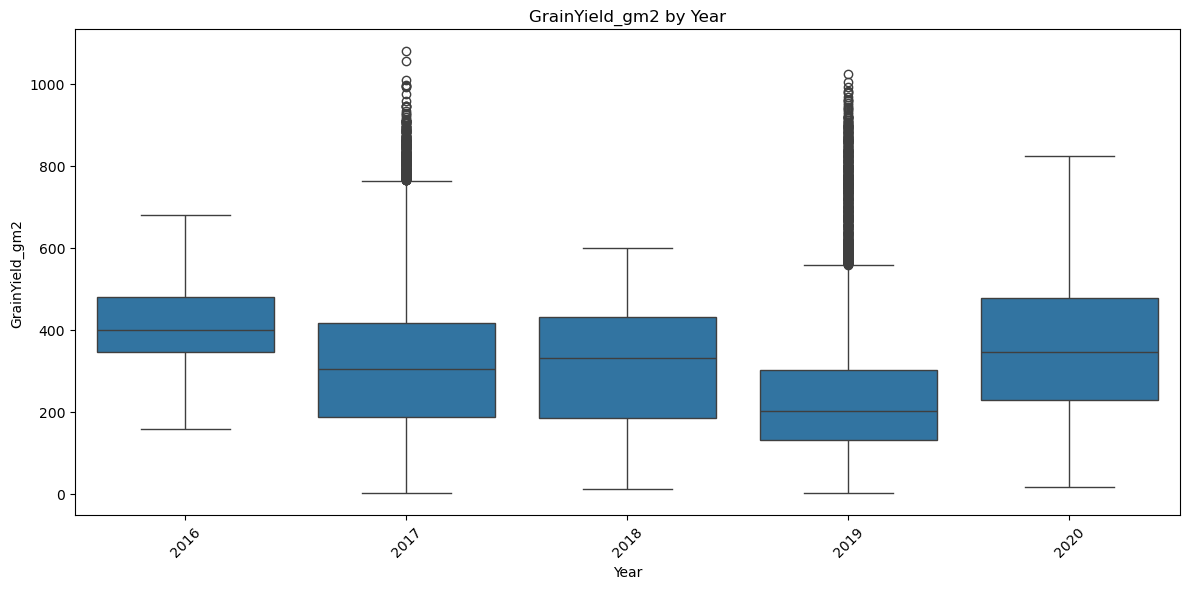

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_centralised, x='Year', y='GrainYield_gm2')
plt.title('GrainYield_gm2 by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

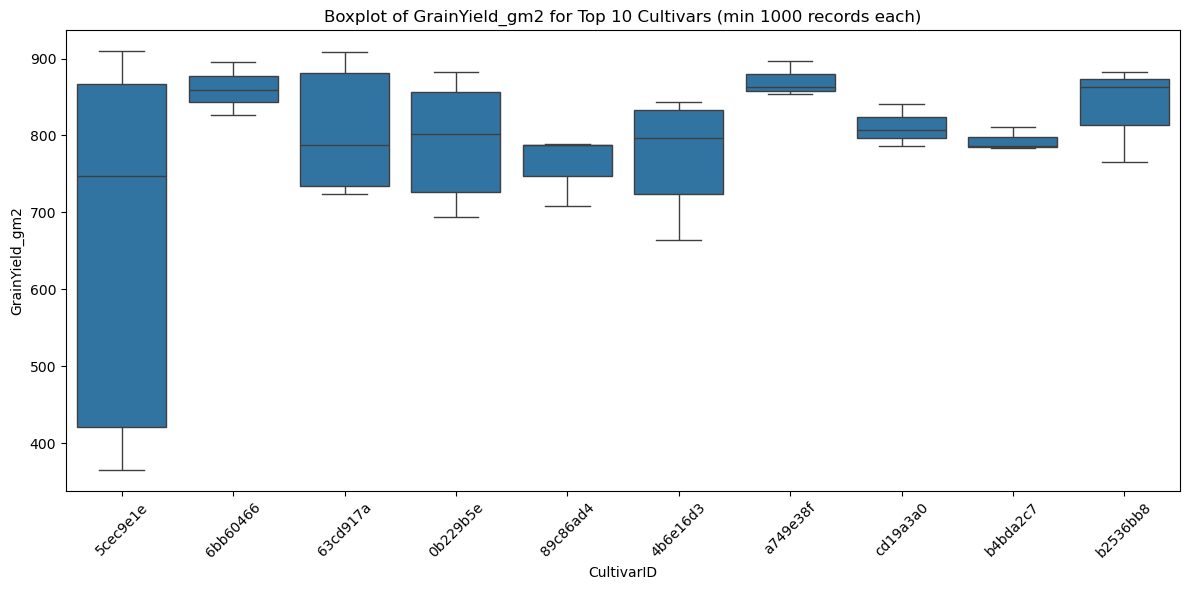

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_data.csv")

# Step 1: Filter out cultivars with fewer than 10 records
cultivar_counts = df_centralised['CultivarID'].value_counts()
valid_cultivars = cultivar_counts[cultivar_counts >= 1].index
df_filtered = df_centralised[df_centralised['CultivarID'].isin(valid_cultivars)]

# Step 2: Compute mean Kg/Plot per cultivar, get top 10
top10_cultivars = (
    df_filtered.groupby('CultivarID')['GrainYield_gm2']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)


# Step 3: Keep only top 10 cultivars
df_top10 = df_filtered[df_filtered['CultivarID'].isin(top10_cultivars)]

df_top10.head()
# Step 4: Create box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top10, x='CultivarID', y='GrainYield_gm2')
plt.title('Boxplot of GrainYield_gm2 for Top 10 Cultivars (min 1000 records each)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


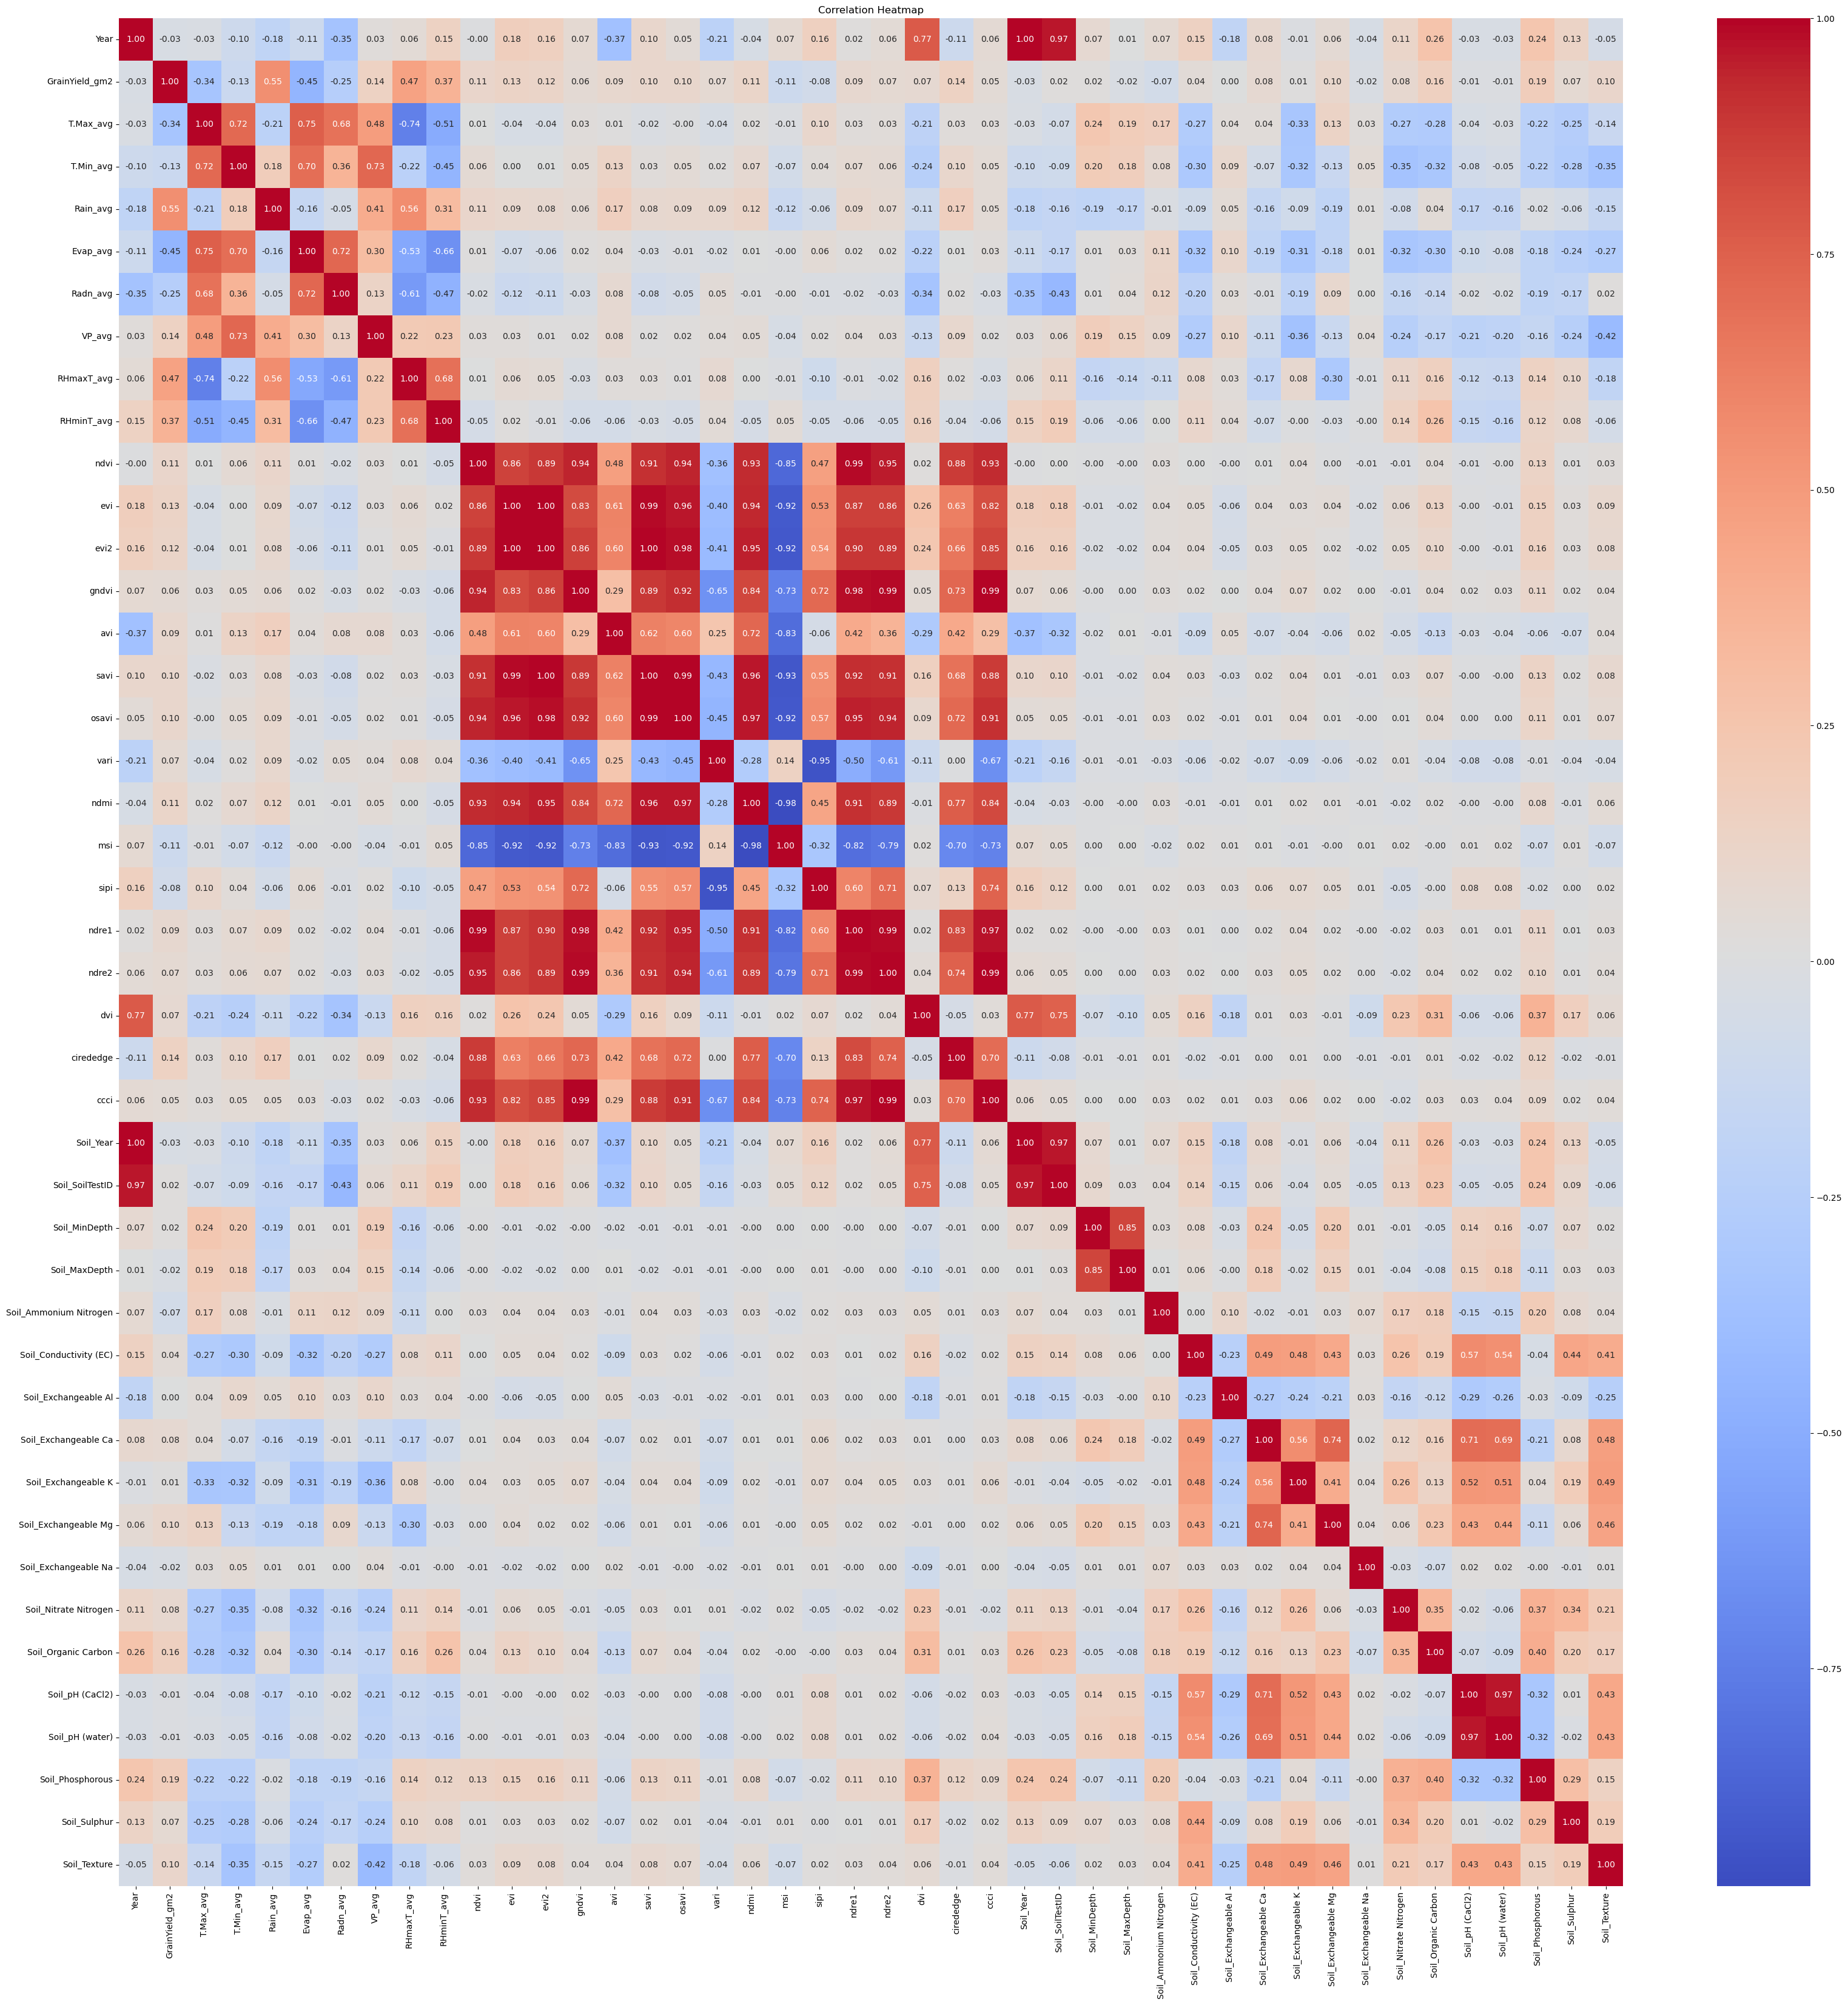

In [9]:
#do correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

numeric_df = df_centralised.select_dtypes(include=['float64', 'int64'])

#numeric_df.drop(columns=['Soil_Released', 'Soil_Year', 'Srn_avg','Sev_avg', 'Ssl_avg', 'Svp_avg', 'Year', 'Soil_SoilTestID'], inplace=True)
#part1 = numeric_df.iloc[:, :int(numeric_df.shape[1] / 2)]
part2 = numeric_df.iloc[:, int(numeric_df.shape[0] / 2):]

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
#correlation_matrix = part1.corr()

# Plot the heatmap
plt.figure(figsize=(40, 40))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


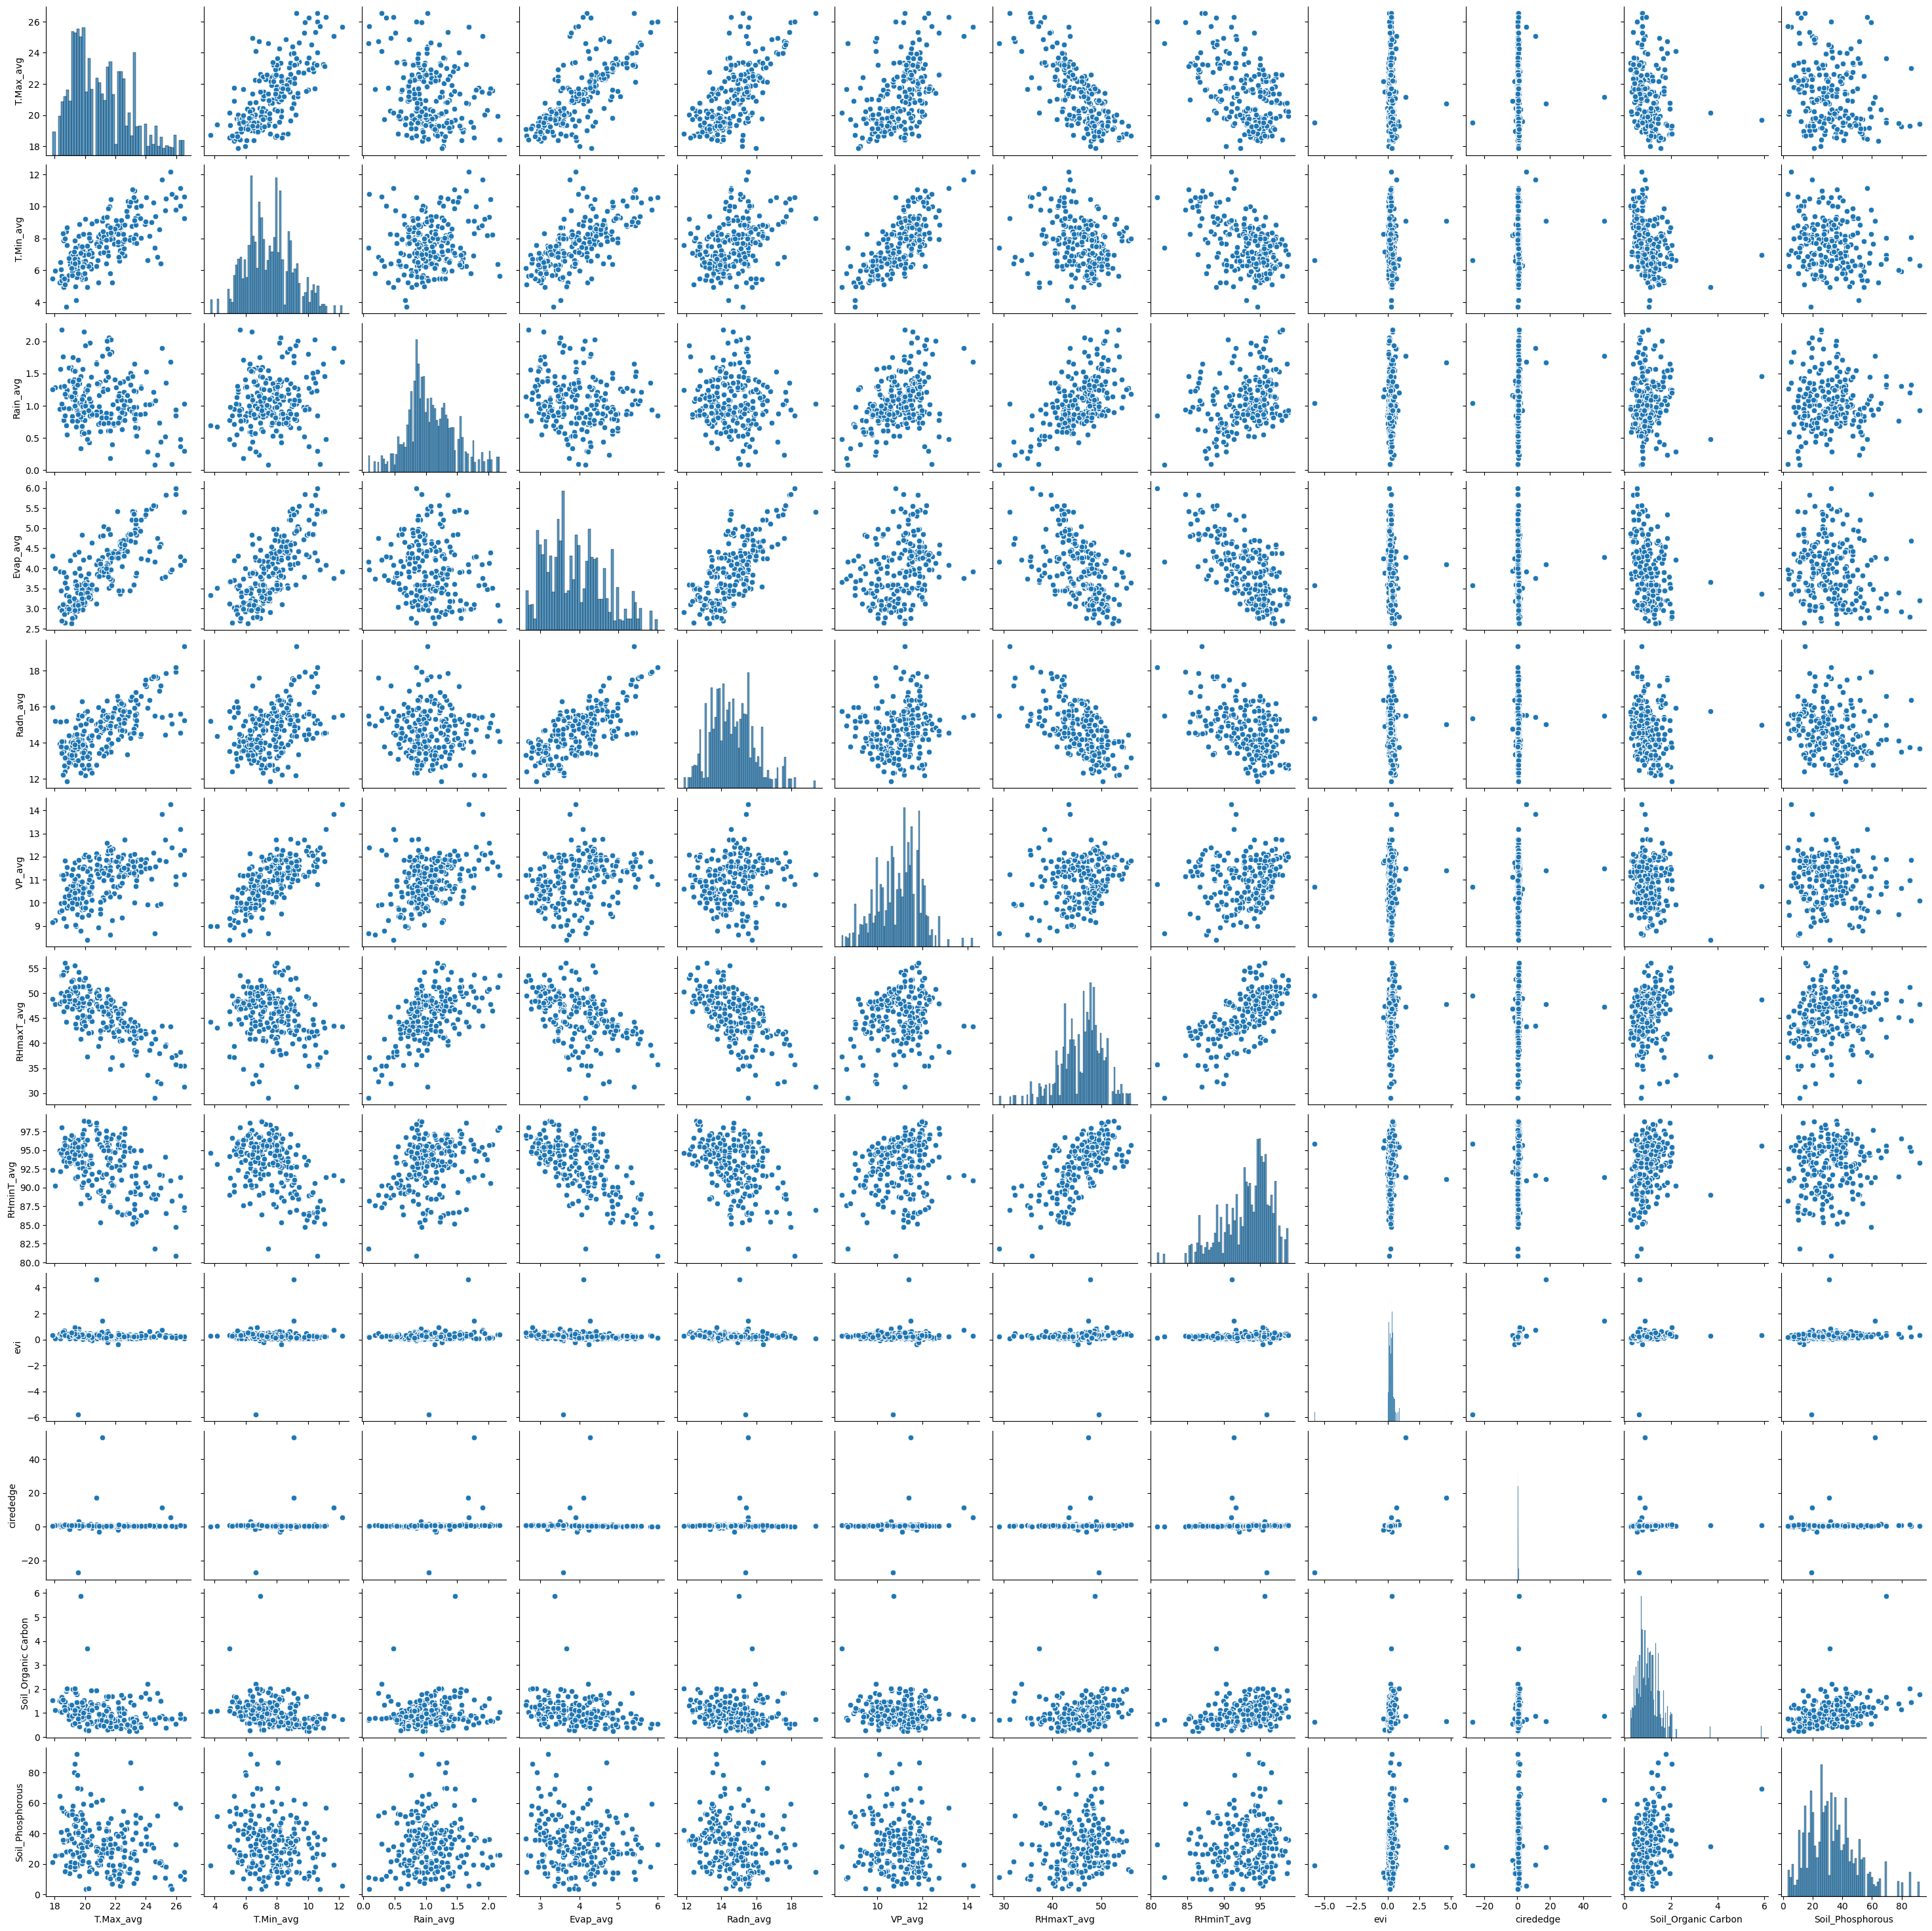

In [10]:
selected_cols = ['T.Max_avg', 'T.Min_avg', 'Rain_avg', 'Evap_avg',
                 'Radn_avg', 'VP_avg', 'RHmaxT_avg', 'RHminT_avg', 'evi', 'cirededge',
                 'Soil_Organic Carbon', 'Soil_Phosphorous']

# Drop missing values to avoid crashing
df_pair = df_centralised[selected_cols].dropna()

sns.pairplot(df_pair)
plt.show()